## Baines CNN Project

In [2]:
# import libs
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [25]:
# set a seed
torch.manual_seed(1)

In [98]:
# get the data
train_dataset = dsets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = dsets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [102]:
# load the data
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=20)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=20)

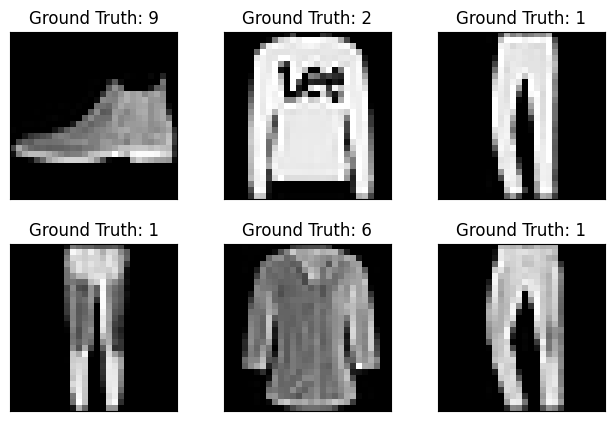

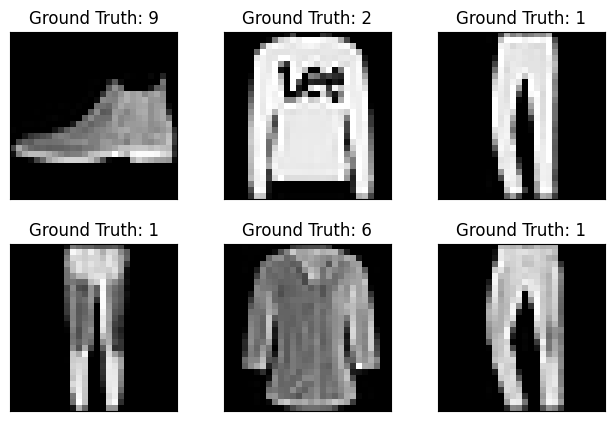

In [107]:
# preview the data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [73]:
# build the CNN
class CNN(nn.Module):
    def __init__(self):
        
        # inherit methods from nn.Module
        super(CNN,self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [74]:
# compile the model
model=CNN()
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)

In [75]:
# set the hyper parameters
learning_rate=0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion=nn.CrossEntropyLoss()

In [77]:
num_epochs = 5
count = 0
N_test=len(test_dataset)
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    cost=0    
    for x, y in train_loader:
        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model(x)
        # calculate loss 
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        cost+=loss.item()
    loss_list.append(cost)
        
        
    correct=0
    #perform a prediction on the test data  
    for x_test, y_test in test_loader:
        z=model(x_test)
        _,yhat=torch.max(z.data,1)
        correct+=(yhat==y_test).sum().item()
    accuracy=correct/N_test
    accuracy_list.append(accuracy)

/opt/anaconda3/envs/boulder/lib/python3.11/site-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


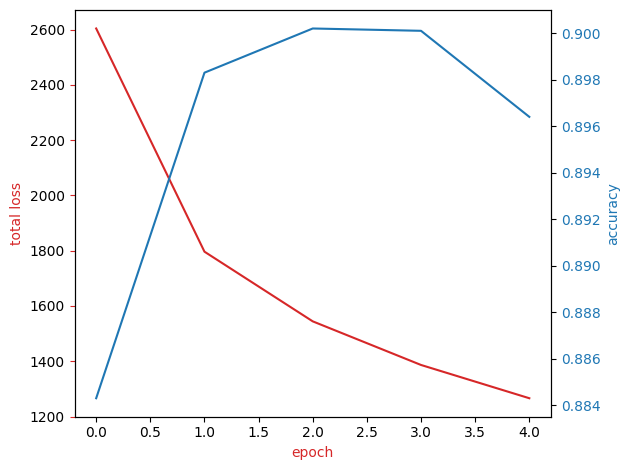

In [78]:
# plot the results
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()